# Comparing alignment-free and usual MSA-based phylogenetic metrics

## Constructing our dataset of alpha, beta, delta and gammacoronaviruses

### Downloading genomic sequences from NCBI via custon E-utilities custom link
Sequences obtained following https://doi.org/10.1371/journal.pone.0264640.
Use it in a simple web-browser.

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nucleotide&id=NC_022103.1,NC_048216.1,NC_046964.1,NC_032107.1,NC_028833.1,NC_028824.1,NC_028814.1,NC_028811.1,NC_032730.1,NC_018871.1,NC_025217.1,NC_030886.1,MN996532,NC_034440.1,NC_014470.1,NC_010438.1,NC_010437.1,NC_009988.1,NC_009021.1,NC_009020.1,NC_009019.1,NC_009657.1,NC_005831.2,NC_002645.1,NC_045512.2,NC_006213.1,NC_038294.1,NC_019843.3,NC_006577.2,NC_004718.3,NC_034972.1,NC_028752.1,MT121216.1,MT040336.1,NC_039207.1,NC_026011.1,NC_017083.1,NC_012936.1,NC_003045.1,KX432213.1,JX860640.1,NC_010646.1,NC_038861.1,NC_030292.1,NC_028806.1,NC_023760.1,NC_002306.3,NC_003436.1,NC_039208.1,NC_010800.1,NC_048214.1,NC_048213.1,NC_046965.1,NC_001451.1,NC_011547.1,NC_016992.1,NC_016991.1,NC_016996.1,NC_016995.1,NC_016994.1,NC_016993.1,NC_011550.1,NC_011549.1,NC_001846.1,NC_048217.1,AC_000192.1&rettype=fasta


Then, place the file sequences in the notebook's folder in order to facilitate finding this file.
(We named this file as cov4gen.fasta)
__________________________________________________________________________________________________________

Verifying its content:

In [1]:
!grep -c ">" cov4gen.fasta

66


In [2]:
!grep ">" cov4gen.fasta

>NC_022103.1 Bat coronavirus CDPHE15/USA/2006, complete genome
>NC_048216.1 NL63-related bat coronavirus strain BtKYNL63-9b, complete genome
>NC_046964.1 Alphacoronavirus Bat-CoV/P.kuhlii/Italy/3398-19/2015, complete genome
>NC_032107.1 NL63-related bat coronavirus strain BtKYNL63-9a, complete genome
>NC_028833.1 BtNv-AlphaCoV/SC2013, complete genome
>NC_028824.1 BtRf-AlphaCoV/YN2012, complete genome
>NC_028814.1 BtRf-AlphaCoV/HuB2013, complete genome
>NC_028811.1 BtMr-AlphaCoV/SAX2011, complete genome
>NC_032730.1 Lucheng Rn rat coronavirus isolate Lucheng-19, complete genome
>NC_018871.1 Rousettus bat coronavirus HKU10, complete genome
>NC_025217.1 Bat Hp-betacoronavirus/Zhejiang2013, complete genome
>NC_030886.1 Rousettus bat coronavirus isolate GCCDC1 356, complete genome
>MN996532.2 Bat coronavirus RaTG13, complete genome
>NC_034440.1 Bat coronavirus isolate PREDICT/PDF-2180, complete genome
>NC_014470.1 Bat coronavirus BM48-31/BGR/2008, complete genome
>NC_010438.1 Miniopterus ba

We add these three sequences from GISAID, as described in the method from the above paper:
* Beijing.IVDC_01
* Beijing.IVDC_02
* Beijing.IVDC_03

In [3]:
!cat cov4gen.fasta 1673264835172.sequences.fasta > db_cov.fasta

In [4]:
!grep -c ">" db_cov.fasta

69


### Multiple Sequence Analysis
Alignment of the 69 sequences using mafft linsi method. 
(We do not recommend to run this in a common user PC because of its wide RAM usage).
This command above consumed high ammounts of RAM!!! (+to 60 GB)

In [ ]:
!nohup linsi --thread 32 --leavegappyregion db_cov.fasta > alig_cov.fasta &

Before running IQTREE, we trimmed the alignment with trimAl v1.4.rev22. We choose to remove all positions in the alignment with gaps in 10% or more of the sequences, unless this leaves less than 70% of original alignment.

In [ ]:
!trimal -in alig_cov.fasta -out trimm_alig_cov.fasta -gt 0.9 -cons 70

### Estimating Maximum-Likelihood Phylogeny
The maximum-likelihood phylogenetic trees were obtained using IQTREE v2.2.0 software with the Ultrafast Bootstrap parameter set at 1000 and 1000 replicates of the SH-aLRT test. We used the GTR+I+G substitution model, as there is evidence that this model choice leads to phylogenetic analyses comparable to those made using current strategies for evolutionary model selection.

In [ ]:
%%bash
IQTREE2=/dados/software/iqtree-2.2.0-Linux/bin/iqtree2
$IQTREE2 -T AUTO -s trimm_alig_cov.fasta -m GTR+I+G -B 1000 -alrt 1000

## Plotting Trees with GGtree with metadata annotation

In [1]:
%load_ext rpy2.ipython

Load the installed packages

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R[write to console]: 
Attaching package: ‘ape’


R[write to console]: The following object is masked from ‘package:dplyr’:

    where


R[write to console]: ggtree v3.7.1.002 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Guangchuang Yu.  Data Integration, Manipulation and Visualization of
Phylogenetic Trees (1st edition). Chapman and Hall/CRC. 2022,
doi:10.1201/9781003279242

LG Wang, TTY Lam, S Xu, Z Dai, L Zhou, T Feng, P Guo, CW Dunn, BR
Jones, T Bradley, H Zhu, Y Guan, Y Jiang, G Yu. treeio: an R package
for phylogenetic tree input and output with richly annotated and
associated data. Molecular Biology and Evolu

png 
  2 


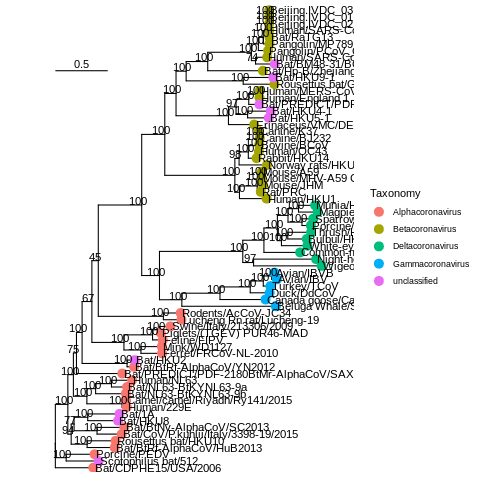

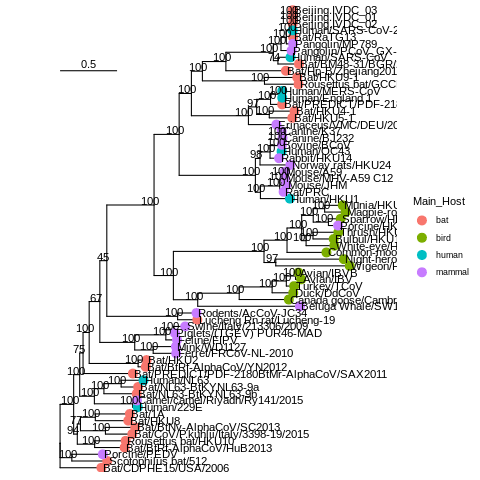

In [2]:
%%R
library(tidyverse)  
library(ape) 
library(ggtree) 
library(tidytree)
library(treeio)

meta = read.csv("meta_cov.csv", sep=",", stringsAsFactors = F)
names(meta)[2] = "label"
head(meta)

tree = read.iqtree("trimm_alig_cov.fasta.contree") 

p = ggtree(tree, ladderize = T)
p$data = left_join(p$data, meta, by="label") 
p1 = p + geom_tippoint(aes(color = Taxonomy), size = 4) +
  geom_tiplab(aes(label = Name), size = 4) +
  geom_treescale(x=0, y=60, width=0.5, color='black') + 
  geom_text2(aes(label=label, subset = !is.na(as.numeric(label))), size = 4 , nudge_x = -0.035, nudge_y = 0.6) +
  theme(legend.position="right") + xlim(-0.3,2.7) 


p2 = p + geom_tippoint(aes(color = Main_Host), size = 4) +
  geom_tiplab(aes(label = Name), size = 4) +
  geom_treescale(x=0, y=60, width=0.5, color='black') + 
  geom_text2(aes(label=label, subset = !is.na(as.numeric(label)) ), size = 4, nudge_x = -0.035, nudge_y = 0.6) +
  theme(legend.position="right") + xlim(-0.3,2.8) 


#better seen in x11 device
plot(p1)
plot(p2)


svg("FIG_taxono.svg", width = 20, height = 10)
plot(p1)
dev.off()

svg("FIG_host.svg", width = 20, height = 10)
plot(p2)
dev.off()

### Obtaining tree statistics and topological properties with phyloTOP R package

In [3]:
%%R
library(phyloTop)
library(treeio)
library(castor)


tree = read.iqtree("trimm_alig_cov.fasta.contree") 

a = phyloTop(c(as.phylo(tree)))
b = phyloTop(c(as.phylo(tree)), normalise = T)

print("Raw metric")
print(a)
print("Normalized")
print(b)

R[write to console]: Loading required package: Rcpp



[1] "Raw metric"
  avgLadder cherries colless.phylo ILnumber maxHeight pitchforks sackin.phylo
1         4       22           542       25        20          8          810
    stairs1   stairs2
1 0.6470588 0.5746997
[1] "Normalized"
   avgLadder  cherries colless.phylo  ILnumber maxHeight pitchforks
1 0.05970149 0.6376812      0.237928 0.3731343 0.2941176  0.3478261
  sackin.phylo   stairs1   stairs2
1    0.3355427 0.6470588 0.5746997


# Generating numerical representation to perforn alignment-free analysis

Using the ad-hoc script called numeric_encoding.py (see README.md).

In [70]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr triplet --thread 12 #triplet

File choosed:
db_cov.fasta
Numeric Encoding:
triplet
Number of threads to use
12


In [71]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr Magnus --thread 12 #Magnus

File choosed:
db_cov.fasta
Numeric Encoding:
Magnus
Number of threads to use
12


In [72]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr Fast --thread 12 #Fast

File choosed:
db_cov.fasta
Numeric Encoding:
Fast
Number of threads to use
12


In [31]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr 4-mer --thread 12 #natural 4-mer

File choosed:
db_cov.fasta
Numeric Encoding:
4-mer
Number of threads to use
12


In [32]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr c-4-mer --thread 12 #natural 4-mer

File choosed:
db_cov.fasta
Numeric Encoding:
c-4-mer
Number of threads to use
12


In [33]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr 6-mer --thread 12 #natural 6-mer

File choosed:
db_cov.fasta
Numeric Encoding:
6-mer
Number of threads to use
12


In [34]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr c-6-mer --thread 12 #natural 6-mer

File choosed:
db_cov.fasta
Numeric Encoding:
c-6-mer
Number of threads to use
12


## Generating a 2D version from each representation

In [35]:
from sklearn.decomposition import PCA, SparsePCA, IncrementalPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
from umap.umap_ import UMAP
import pandas as pd

def scaler(data):
    mms = MinMaxScaler()
    return mms.fit_transform(data.to_numpy())

MY_SEED = 42

/home/murilo/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Reading and parsing (scale) data

In [36]:
triplet = pd.read_csv("db_cov.fasta.triplet.csv", index_col= 0)
triplet = scaler(triplet.set_index("id"))

In [37]:
fast = pd.read_csv("db_cov.fasta.fast.csv", index_col= 0, header = None)
fast = scaler(fast.set_index(1))

In [38]:
magnus = pd.read_csv("db_cov.fasta.magnus.csv", index_col= 0, header = None)
magnus = magnus.loc[["NC_022103.1","NC_048216.1","NC_046964.1","NC_032107.1","NC_028833.1","NC_028824.1","NC_028814.1","NC_028811.1","NC_032730.1","NC_018871.1","NC_025217.1","NC_030886.1","MN996532.2","NC_034440.1","NC_014470.1","NC_010438.1","NC_010437.1","NC_009988.1","NC_009021.1","NC_009020.1","NC_009019.1","NC_009657.1","NC_005831.2","NC_002645.1","NC_045512.2","NC_006213.1","NC_038294.1","NC_019843.3","NC_006577.2","NC_004718.3","NC_034972.1","NC_028752.1","MT121216.1","MT040336.1","NC_039207.1","NC_026011.1","NC_017083.1","NC_012936.1","NC_003045.1","KX432213.1","JX860640.1","NC_010646.1","NC_038861.1","NC_030292.1","NC_028806.1","NC_023760.1","NC_002306.3","NC_003436.1","NC_039208.1","NC_010800.1","NC_048214.1","NC_048213.1","NC_046965.1","NC_001451.1","NC_011547.1","NC_016992.1","NC_016991.1","NC_016996.1","NC_016995.1","NC_016994.1","NC_016993.1","NC_011550.1","NC_011549.1","NC_001846.1","NC_048217.1","AC_000192.1","hCoV-19/Beijing/IVDC-01-06/2020","hCoV-19/Beijing/IVDC-02-06/2020","hCoV-19/env/Beijing/IVDC-03-06/2020"]]
#["NC_022103.1","NC_048216.1","NC_046964.1","NC_032107.1","NC_028833.1","NC_028824.1","NC_028814.1","NC_028811.1","NC_032730.1","NC_018871.1","NC_025217.1","NC_030886.1","MN996532.2","NC_034440.1","NC_014470.1","NC_010438.1","NC_010437.1","NC_009988.1","NC_009021.1","NC_009020.1","NC_009019.1","NC_009657.1","NC_005831.2","NC_002645.1","NC_045512.2","NC_006213.1","NC_038294.1","NC_019843.3","NC_006577.2","NC_004718.3","NC_034972.1","NC_028752.1","MT121216.1","MT040336.1","NC_039207.1","NC_026011.1","NC_017083.1","NC_012936.1","NC_003045.1","KX432213.1","JX860640.1","NC_010646.1","NC_038861.1","NC_030292.1","NC_028806.1","NC_023760.1","NC_002306.3","NC_003436.1","NC_039208.1","NC_010800.1","NC_048214.1","NC_048213.1","NC_046965.1","NC_001451.1","NC_011547.1","NC_016992.1","NC_016991.1","NC_016996.1","NC_016995.1","NC_016994.1","NC_016993.1","NC_011550.1","NC_011549.1","NC_001846.1","NC_048217.1","AC_000192.1","hCoV-19/Beijing/IVDC-01-06/2020","hCoV-19/Beijing/IVDC-02-06/2020","hCoV-19/env/Beijing/IVDC-03-06/2020"])
magnus = scaler(magnus) #this one  must be scaled

In [39]:
nat4mer = pd.read_csv("db_cov.fasta.4natvec.csv", index_col= 0)
nat4mer = nat4mer.set_index("id")
nat4mer = scaler(nat4mer) #this one  must be scaled

In [40]:
cnat4mer = pd.read_csv("db_cov.fasta.c4natvec.csv", index_col= 0)
cnat4mer = cnat4mer.set_index("id")
cnat4mer = scaler(cnat4mer) #this one  must be scaled

In [41]:
nat6mer = pd.read_csv("db_cov.fasta.6natvec.csv", index_col= 0)
nat6mer = nat6mer.set_index("id")
nat6mer = scaler(nat6mer) #this one  must be scaled

In [42]:
cnat6mer = pd.read_csv("db_cov.fasta.c6natvec.csv", index_col= 0)
cnat6mer = cnat6mer.set_index("id")
cnat6mer = scaler(cnat6mer) #this one  must be scaled

## Transformations with Dimensionality Reduction

### Setting Global Variables
#### This is extremelly important

In [43]:
PCAm = None
var1 = None
var2 = None
UMAPa = None
UMAPb = None
UMAPc = None
MDS_transformed = None
stress = None

In [44]:
%%R
#metadata from the 69 genomes
meta = read.csv("meta_cov.csv", sep = ",", head=1)

### Function for trasnforming
we are using global variables to 

In [45]:
def red_dim_tech(repr_num):
    global PCAm
    global var1
    global var2
    global UMAPa
    global UMAPb
    global UMAPc
    global MDS_transformed
    global stress
    global MY_SEED
    #PCA
    model = PCA(n_components=2)
    model.fit(repr_num)
    PCAm = model.fit_transform(repr_num)
    var1 = model.explained_variance_ratio_[0]
    var2 = model.explained_variance_ratio_[1]
    #UMAP
    reducer_a = UMAP(n_neighbors=68, transform_seed=MY_SEED, n_jobs=12)
    UMAPa = reducer_a.fit_transform(repr_num)
    reducer_b = UMAP(n_neighbors=30, transform_seed=MY_SEED, n_jobs=12)
    UMAPb = reducer_b.fit_transform(repr_num)
    reducer_c = UMAP(n_neighbors=17, transform_seed=MY_SEED, n_jobs=12)
    UMAPc = reducer_c.fit_transform(repr_num)
    #MDS
    MDSm = MDS(n_components=2, metric=True, n_init = 30, random_state = MY_SEED, n_jobs = 12)
    MDSm.fit(repr_num)
    MDS_transformed = MDSm.fit_transform(repr_num)
    stress = MDSm.stress_


### Function for plotting

In [46]:
%%R
library(ggplot2)
library(ggpubr)

graph_it = function(filename_svg = "dafault.svg") {
    df = cbind(meta, PCAm)
    names(df)[6]="PCA_1"
    names(df)[7]="PCA_2"
    pt = df %>% 
        ggplot(aes(x = PCA_1, y = PCA_2, color = Taxonomy)) +
        geom_point() + 
        labs(title=paste0("PCA - Var(PCA_1, PCA_2) = (",round(var1, 2),",",round(var2,2),")"))
    ph = df %>% 
        ggplot(aes(x = PCA_1, y = PCA_2, color = Main_Host )) +
        geom_point() + 
        labs(title=paste0("PCA - Var(PCA_1, PCA_2) = (",round(var1, 2),",",round(var2,2),")"))
    df = cbind(meta, UMAPa)
    names(df)[6]="UMAP_1"
    names(df)[7]="UMAP_2"
    u1t = df %>% 
        ggplot(aes(x = UMAP_1, y = UMAP_2, color = Taxonomy)) +
        geom_point() + 
        labs(title = "UMAP 68 neighbors")
    u1h = df %>% 
        ggplot(aes(x = UMAP_1, y = UMAP_2, color = Main_Host )) +
        geom_point() + 
        labs(title = "UMAP 68 neighbors")
    df = cbind(meta, UMAPb)
    names(df)[6]="UMAP_1"
    names(df)[7]="UMAP_2"
    u2t = df %>% 
        ggplot(aes(x = UMAP_1, y = UMAP_2, color = Taxonomy)) +
        geom_point() + 
        labs(title = "UMAP 30 neighbors")
    u2h = df %>% 
        ggplot(aes(x = UMAP_1, y = UMAP_2, color = Main_Host )) +
        geom_point() + 
        labs(title = "UMAP 30 neighbors")
    df = cbind(meta, UMAPc)
    names(df)[6]="UMAP_1"
    names(df)[7]="UMAP_2"
    u3t = df %>% 
        ggplot(aes(x = UMAP_1, y = UMAP_2, color = Taxonomy)) +
        geom_point() + 
        labs(title = "UMAP 17 neighbors")
    u3h = df %>% 
        ggplot(aes(x = UMAP_1, y = UMAP_2, color = Main_Host )) +
        geom_point() + 
        labs(title = "UMAP 17 neighbors")
    df = cbind(meta, MDS_transformed)
    names(df)[6]="MDS_1"
    names(df)[7]="MDS_2"
    mt = df %>% 
        ggplot(aes(x = MDS_1, y = MDS_2, color = Taxonomy)) +
        geom_point() + 
        labs(title=paste0("MDS - Stress = ", round(stress, 2)))
    mh = df %>% 
        ggplot(aes(x = MDS_1, y = MDS_2, color = Main_Host )) +
        geom_point() + 
        labs(title=paste0("MDS - Stress = ", round(stress, 2)))
    l1 = ggarrange(
        pt, mt, u1t, u2t, u3t, nrow = 1,
        common.legend = TRUE, legend = "bottom"
    )
    l2 = ggarrange(
        ph, mh, u1h, u2h, u3h, nrow = 1,
        common.legend = TRUE, legend = "bottom"
    ) 
    svg(filename_svg, width = 20, height = 10)
    plot(ggarrange(l1,l2, nrow = 2))
    dev.off()

}

### Applying

In [47]:
red_dim_tech(repr_num = triplet)

In [48]:
%%R -i PCAm -i var1 -i var2 -i UMAPa -i UMAPb -i UMAPc -i MDS_transformed -i stress
graph_it(filename_svg = "FIG_triplet.svg")

png 
  2 


In [49]:
red_dim_tech(repr_num = fast)

In [50]:
%%R -i PCAm -i var1 -i var2 -i UMAPa -i UMAPb -i UMAPc -i MDS_transformed -i stress
graph_it(filename_svg = "FIG_fast.svg")

png 
  2 


In [51]:
red_dim_tech(repr_num = magnus)

In [52]:
%%R -i PCAm -i var1 -i var2 -i UMAPa -i UMAPb -i UMAPc -i MDS_transformed -i stress
graph_it(filename_svg = "FIG_magnus.svg")

png 
  2 


In [53]:
red_dim_tech(repr_num = nat4mer)

In [54]:
%%R -i PCAm -i var1 -i var2 -i UMAPa -i UMAPb -i UMAPc -i MDS_transformed -i stress
graph_it(filename_svg = "FIG_nat4mer.svg")

png 
  2 


In [55]:
red_dim_tech(repr_num = cnat4mer)

In [56]:
%%R -i PCAm -i var1 -i var2 -i UMAPa -i UMAPb -i UMAPc -i MDS_transformed -i stress
graph_it(filename_svg = "FIG_cnat4mer.svg")

png 
  2 


In [57]:
red_dim_tech(repr_num = nat6mer)

In [58]:
%%R -i PCAm -i var1 -i var2 -i UMAPa -i UMAPb -i UMAPc -i MDS_transformed -i stress
graph_it(filename_svg = "FIG_nat6mer.svg")

png 
  2 


In [59]:
red_dim_tech(repr_num = cnat6mer)

In [60]:
%%R -i PCAm -i var1 -i var2 -i UMAPa -i UMAPb -i UMAPc -i MDS_transformed -i stress
graph_it(filename_svg = "FIG_cnat6mer.svg")

png 
  2 


## Comparing alignment-free distances with ML-tree-based distances

Reading libraries and general data

In [61]:
%%R
library(treeio)
library(castor)
library(tidyverse)
library(ggExtra)
library(ggpubr)
library(ggpmisc)
library(reshape2)

normalize <- function(x, na.rm = TRUE) {
  return((x- min(x)) /(max(x)-min(x)))
}

tree = read.iqtree("trimm_alig_cov.fasta.contree") 

meta = read.csv("meta_cov.csv", sep = ",", head=1)

Loading the numerical representation into R workspace

In [62]:
%%R

triplet = read.csv("db_cov.fasta.triplet.csv", sep = ",", header = T, row.names = 2)
triplet[,"X"] = NULL
triplet = apply(triplet, MARGIN = 2, FUN = normalize)

fast = read.csv("db_cov.fasta.fast.csv", sep = ",", header = F, row.names = 2)
fast[,"V1"] = NULL
fast = apply(fast, MARGIN = 2, FUN = normalize)

magnus = read.csv("db_cov.fasta.magnus.csv", sep = ",", header = F, row.names = 1)
magnus = apply(magnus, MARGIN = 2, FUN = normalize)

nat4mer = read.csv("db_cov.fasta.4natvec.csv", sep = ",", header = T, row.names = 2)
nat4mer[,1] = NULL
nat4mer = apply(nat4mer, MARGIN = 2, FUN = normalize)

cnat4mer = read.csv("db_cov.fasta.c4natvec.csv", sep = ",", header = T, row.names = 2)
cnat4mer[,1] = NULL
cnat4mer = apply(cnat4mer, MARGIN = 2, FUN = normalize)

nat6mer = read.csv("db_cov.fasta.6natvec.csv", sep = ",", header = T, row.names = 2)
nat6mer[,1] = NULL
nat6mer = apply(nat6mer, MARGIN = 2, FUN = normalize)

cnat6mer = read.csv("db_cov.fasta.c6natvec.csv", sep = ",", header = T, row.names = 2)
cnat6mer[,1] = NULL
cnat6mer = apply(cnat6mer, MARGIN = 2, FUN = normalize)

Estimating distances

In [63]:
%%R
tt = as.phylo(tree)
N = length(tt$tip.label)
distances = as.data.frame(matrix(data = NA, nrow = 0, ncol = 13))
names(distances) = c("Tip1", "Tip2", "Patristic_Length", "Patristic_Edge", "Triplets", "Fast", "Magnus", "Nat-4-mer", "Cumulat.Nat-4-mer", "Nat-6-mer", "Cumulat.Nat-6-mer", "Host", "Taxonomy")

for (I in 1:(N-1)) {
  for (J in (I+1):(N)) {
    i = tt$tip.label[I]
    j = tt$tip.label[J]
    p1 = get_pairwise_distances(as.phylo(tree), i, j,  as_edge_counts=F)
    p2 = get_pairwise_distances(as.phylo(tree), i, j,  as_edge_counts=T)
    t = dist(triplet[c(i,j),])
    f = dist(fast[c(i,j),])
    m = dist(magnus[c(i,j),])
    n4 = dist(nat4mer[c(i,j),])
    n6 = dist(nat6mer[c(i,j),])
    n4_2 = dist(cnat4mer[c(i,j),])
    n6_2 = dist(cnat6mer[c(i,j),])
    h = "Inside_Host"
    if(meta[meta$id == i,]$Main_Host != meta[meta$id == j,]$Main_Host){
      h = "Outside_Host"
    }
    tx = "Inside_Genera"
    if(meta[meta$id == i,]$Taxonomy != meta[meta$id == j,]$Taxonomy){
      tx = "Outside_Genera"
    }
    distances[nrow(distances)+1,] = c(i,j,p1,p2,t,f,m,n4,n4_2,n6,n6_2,h,tx)
  }
}

distances$Patristic_Length = as.numeric(distances$Patristic_Length)
distances$Patristic_Edge = as.numeric(distances$Patristic_Edge)
distances$Triplets = as.numeric(distances$Triplets)
distances$Fast = as.numeric(distances$Fast)
distances$Magnus = as.numeric(distances$Magnus)
distances$`Nat-4-mer` = as.numeric(distances$`Nat-4-mer`)
distances$`Nat-6-mer` = as.numeric(distances$`Nat-6-mer`)
distances$`Cumulat.Nat-4-mer` = as.numeric(distances$`Cumulat.Nat-4-mer`)
distances$`Cumulat.Nat-6-mer` = as.numeric(distances$`Cumulat.Nat-6-mer`)
distances$Host = as.factor(distances$Host)
distances$Taxonomy = as.factor(distances$Taxonomy)

head(distances)

         Tip1        Tip2 Patristic_Length Patristic_Edge Triplets      Fast
1 NC_022103.1 NC_048216.1         1.035776              6 1.644518 0.4523872
2 NC_022103.1 NC_032107.1         1.047815              7 1.516649 0.2579725
3 NC_022103.1 NC_005831.2         1.095047              7 2.591785 0.6219814
4 NC_022103.1 NC_002645.1         1.044619              6 1.477611 0.5428242
5 NC_022103.1 NC_028752.1         1.037647              6 1.404769 0.4820597
6 NC_022103.1 NC_028824.1         1.115330              7 1.496652 0.7049447
     Magnus Nat-4-mer Cumulat.Nat-4-mer Nat-6-mer Cumulat.Nat-6-mer
1 10.600712  6.556972          7.046162  35.38861          39.13665
2  9.981643  5.974701          6.429745  34.19076          37.77139
3 11.674563  7.798508          8.598299  35.64975          40.33369
4  9.884774  6.604658          7.182123  33.61121          37.35985
5 10.000942  6.023777          6.498153  33.47698          37.00745
6 10.125089  6.530497          7.229603  33.51319    

Plotting data and performing regressions

Doing comparisons between the same kind of measurements

In [64]:
%%R

pdf("FIG_Patristic_only.pdf", paper = "a4", compress = F)

p = distances %>%
  ggplot(aes(x=Patristic_Edge, y=Patristic_Length, colour=Taxonomy)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value),
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

p = distances %>%
  ggplot(aes(x=Patristic_Edge, y=Patristic_Length, colour=Host)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value),
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

dev.off()



pdf("FIG_Numeric_only.pdf", paper = "a4", compress = F)
p = distances %>%
  ggplot(aes(x=Triplets, y=Fast, colour=Taxonomy)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value),
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

p = distances %>%
  ggplot(aes(x=Triplets, y=Fast, colour=Host)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

p = distances %>%
  ggplot(aes(x=Fast, y=`Nat-4-mer`, colour=Taxonomy)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

p = distances %>%
  ggplot(aes(x=Fast, y=`Nat-4-mer`, colour=Host)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))


p = distances %>%
  ggplot(aes(x=`Nat-4-mer`, y=`Nat-6-mer`, colour=Taxonomy)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

p = distances %>%
  ggplot(aes(x=`Nat-4-mer`, y=`Nat-6-mer`, colour=Host)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

p = distances %>%
  ggplot(aes(x=`Nat-6-mer`, y=`Cumulat.Nat-6-mer`, colour=Taxonomy)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

p = distances %>%
  ggplot(aes(x=`Nat-6-mer`, y=`Cumulat.Nat-6-mer`, colour=Host)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

p = distances %>%
  ggplot(aes(x=`Nat-4-mer`, y=`Cumulat.Nat-4-mer`, colour=Taxonomy)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

p = distances %>%
  ggplot(aes(x=`Nat-4-mer`, y=`Cumulat.Nat-4-mer`, colour=Host)) +
    geom_point() +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))
    )
plot(ggMarginal(p, size = 7.5,  groupColour = T, groupFill = T, type="density"))

dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
png 
  2 


Doing comparisons between the Patristic and Numeric

In [65]:
%%R
test_dist = melt(distances, measure.vars = c("Triplets", "Fast", "Magnus", "Nat-4-mer", "Cumulat.Nat-4-mer", "Nat-6-mer", "Cumulat.Nat-6-mer"), variable.name = "Distance")
names(test_dist)[8]="Dist_value"
test_dist = melt(test_dist, measure.vars = c("Patristic_Length","Patristic_Edge"), variable.name = "Patristic")
names(test_dist)[8]="Patristic_value"

svg("FIG_Taxonomy_comp_dist.svg", width = 20, height = 10)

p = test_dist %>%
  ggplot(aes(x=Dist_value, y=Patristic_value, col=Taxonomy)) +
    geom_point(alpha = 0.3) +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        p.digits = 2,
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(#after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))) +
    facet_grid(Patristic~Distance, scales = "free")
plot(p)

dev.off()

svg("FIG_Host_comp_dist.svg", width = 20, height = 10)

p = test_dist %>%
  ggplot(aes(x=Dist_value, y=Patristic_value, col=Host)) +
    geom_point(alpha = 0.3) +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(#after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value),
                          sep = "*\", \"*"))) + 
    facet_grid(Patristic~Distance, scales = "free")
plot(p)

dev.off()


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
png 
  2 


Splitting by host specie and taxonomic genera

In [66]:
%%R
distances = as.data.frame(matrix(data = NA, nrow = 0, ncol = 13))
names(distances) = c("Tip1", "Tip2", "Patristic_Length", "Patristic_Edge", "Triplets", "Fast", "Magnus", "Nat-4-mer", "Cumulat.Nat-4-mer", "Nat-6-mer", "Cumulat.Nat-6-mer", "Host", "Taxonomy")

for (I in 1:(N-1)) {
  for (J in (I+1):(N)) {
    i = tt$tip.label[I]
    j = tt$tip.label[J]
    p1 = get_pairwise_distances(as.phylo(tree), i, j,  as_edge_counts=F)
    p2 = get_pairwise_distances(as.phylo(tree), i, j,  as_edge_counts=T)
    t = dist(triplet[c(i,j),])
    f = dist(fast[c(i,j),])
    m = dist(magnus[c(i,j),])
    n4 = dist(nat4mer[c(i,j),])
    n6 = dist(nat6mer[c(i,j),])
    n4_2 = dist(cnat4mer[c(i,j),])
    n6_2 = dist(cnat6mer[c(i,j),])
    h = "Outside_Host"
    if(meta[meta$id == i,]$Main_Host == meta[meta$id == j,]$Main_Host){
      h = meta[meta$id == i,]$Main_Host
    }
    tx = "Outside_Genera"
    if(meta[meta$id == i,]$Taxonomy == meta[meta$id == j,]$Taxonomy){
      tx = meta[meta$id == i,]$Taxonomy
    }
    distances[nrow(distances)+1,] = c(i,j,p1,p2,t,f,m,n4,n4_2,n6,n6_2,h,tx)
  }
}

distances$Patristic_Length = as.numeric(distances$Patristic_Length)
distances$Patristic_Edge = as.numeric(distances$Patristic_Edge)
distances$Triplets = as.numeric(distances$Triplets)
distances$Fast = as.numeric(distances$Fast)
distances$Magnus = as.numeric(distances$Magnus)
distances$`Nat-4-mer` = as.numeric(distances$`Nat-4-mer`)
distances$`Nat-6-mer` = as.numeric(distances$`Nat-6-mer`)
distances$`Cumulat.Nat-4-mer` = as.numeric(distances$`Cumulat.Nat-4-mer`)
distances$`Cumulat.Nat-6-mer` = as.numeric(distances$`Cumulat.Nat-6-mer`)
distances$Host = as.factor(distances$Host)
distances$Taxonomy = as.factor(distances$Taxonomy)
distances = distances %>% filter(Taxonomy != "Outside_Genera" & Taxonomy != "unclassified")

test_dist = melt(distances, measure.vars = c("Triplets","Fast","Magnus", "Nat-4-mer", "Cumulat.Nat-4-mer", "Nat-6-mer", "Cumulat.Nat-6-mer"), variable.name = "Distance")
names(test_dist)[8]="Dist_value"
test_dist = melt(test_dist, measure.vars = c("Patristic_Length","Patristic_Edge"), variable.name = "Patristic")
names(test_dist)[8]="Patristic_value"


svg("FIG_Genera_comp_dist.svg", width = 20, height = 10)
p = test_dist %>%
  ggplot(aes(x=Dist_value, y=Patristic_value, col=Taxonomy)) +
    geom_point(alpha = 0.3) +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(#after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))) + 
    facet_grid(Patristic~Distance, scales = "free")
plot(p)
dev.off()


distances = as.data.frame(matrix(data = NA, nrow = 0, ncol = 13))
names(distances) = c("Tip1", "Tip2", "Patristic_Length", "Patristic_Edge", "Triplets", "Fast", "Magnus", "Nat-4-mer", "Cumulat.Nat-4-mer", "Nat-6-mer", "Cumulat.Nat-6-mer", "Host", "Taxonomy")

for (I in 1:(N-1)) {
  for (J in (I+1):(N)) {
    i = tt$tip.label[I]
    j = tt$tip.label[J]
    p1 = get_pairwise_distances(as.phylo(tree), i, j,  as_edge_counts=F)
    p2 = get_pairwise_distances(as.phylo(tree), i, j,  as_edge_counts=T)
    t = dist(triplet[c(i,j),])
    f = dist(fast[c(i,j),])
    m = dist(magnus[c(i,j),])
    n4 = dist(nat4mer[c(i,j),])
    n6 = dist(nat6mer[c(i,j),])
    n4_2 = dist(cnat4mer[c(i,j),])
    n6_2 = dist(cnat6mer[c(i,j),])
    h = "Outside_Host"
    if(meta[meta$id == i,]$Main_Host == meta[meta$id == j,]$Main_Host){
      h = meta[meta$id == i,]$Main_Host
    }
    tx = "Outside_Genera"
    if(meta[meta$id == i,]$Taxonomy == meta[meta$id == j,]$Taxonomy){
      tx = meta[meta$id == i,]$Taxonomy
    }
    distances[nrow(distances)+1,] = c(i,j,p1,p2,t,f,m,n4,n4_2,n6,n6_2,h,tx)
  }
}

distances$Patristic_Length = as.numeric(distances$Patristic_Length)
distances$Patristic_Edge = as.numeric(distances$Patristic_Edge)
distances$Triplets = as.numeric(distances$Triplets)
distances$Fast = as.numeric(distances$Fast)
distances$Magnus = as.numeric(distances$Magnus)
distances$`Nat-4-mer` = as.numeric(distances$`Nat-4-mer`)
distances$`Nat-6-mer` = as.numeric(distances$`Nat-6-mer`)
distances$`Cumulat.Nat-4-mer` = as.numeric(distances$`Cumulat.Nat-4-mer`)
distances$`Cumulat.Nat-6-mer` = as.numeric(distances$`Cumulat.Nat-6-mer`)
distances$Host = as.factor(distances$Host)
distances$Taxonomy = as.factor(distances$Taxonomy)

distances = distances %>% filter(Host != "Outside_Host")

test_dist = melt(distances, measure.vars = c("Triplets","Fast","Magnus","Nat-4-mer","Cumulat.Nat-4-mer","Nat-6-mer","Cumulat.Nat-6-mer"), variable.name = "Distance")
names(test_dist)[8]="Dist_value"
test_dist = melt(test_dist, measure.vars = c("Patristic_Length","Patristic_Edge"), variable.name = "Patristic")
names(test_dist)[8]="Patristic_value"

svg("FIG_CommonHost_comp_dist.svg", width = 20, height = 10)
p = test_dist %>%
  ggplot(aes(x=Dist_value, y=Patristic_value, col=Host)) +
    geom_point(alpha = 0.3) +
    geom_smooth(method=lm , se=TRUE) +
    theme(legend.position = "bottom") +
    stat_poly_eq(
        label.y.npc = "bottom",
        label.x.npc = "right",
        aes(label = paste(after_stat(eq.label),
                          after_stat(rr.label),
                          after_stat(p.value), 
                          sep = "*\", \"*"))) + 
    facet_grid(Patristic~Distance, scales = "free")
plot(p)
dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
png 
  2 


# Performing Neighbor-Joining trees by distances from numerical encodings, with bootstrap

In [67]:
%%R
library(phyloTop)
library(ggtree)
library(phylotools)
library(treeio)

names(meta)[2] = "label"

boot.ggtree <- function(data, B = 1000, nt = 4, nudgex = -0.25, nudgey = 0.7) {
  func <- function(x) nj(dist(x, method = "euclidean"))
  tr_real = func(data)
  btp = boot.phylo(tr_real, data, FUN=func, B=B, mc.cores = nt)
  p = ggtree(tr_real, ladderize = T) 
  p$data = left_join(p$data, meta, by="label")
  p$data$Support = NA
  p$data$Support[p$data$isTip == FALSE] = btp / B * 100
  p1 = p + geom_tippoint(aes(color = Taxonomy), size = 4) +
    geom_tiplab(aes(label = Name), size = 3) +
    geom_treescale(x=0, y=60, width=0.5, color='black') + 
    geom_text2(aes(label=Support, subset = !is.na(as.numeric(Support)) ), nudge_x = nudgex, nudge_y = nudgey)
  return(p1)
}


In [69]:
%%R
set.seed(42)
pa = boot.ggtree(triplet, B = 1000, nt = 12, nudgex = -0.035, nudgey = 0.7) + xlim(-0.2, 4) 

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [70]:
%%R
set.seed(42)
pb = boot.ggtree(fast, B = 1000, nt = 12, nudgex = -0.02, nudgey = 0.7) + xlim(-0.2, 2.5)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [71]:
%%R
set.seed(42)
pc = boot.ggtree(magnus, B = 1000, nt = 12, nudgex = -0.08, nudgey = 0.7) + xlim(-0.2, 11)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [72]:
%%R
set.seed(42)
pd = boot.ggtree(nat4mer, B = 1000, nt = 12, nudgex = -0.1, nudgey = 0.7) + xlim(-0.2, 10)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [74]:
%%R
set.seed(42)
pe = boot.ggtree(nat6mer, B = 1000, nt = 12, nudgex = -0.25, nudgey = 0.7) + xlim(-0.2, 27)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [75]:
%%R
set.seed(42)
pdc = boot.ggtree(cnat4mer, B = 1000, nt = 12, nudgex = -0.1, nudgey = 0.7) + xlim(-0.2, 10)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [76]:
%%R
set.seed(42)
pec = boot.ggtree(cnat6mer, B = 1000, nt = 12, nudgex = -0.25, nudgey = 0.7) + xlim(-0.2, 27)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


## Plotting bootstrap distributions

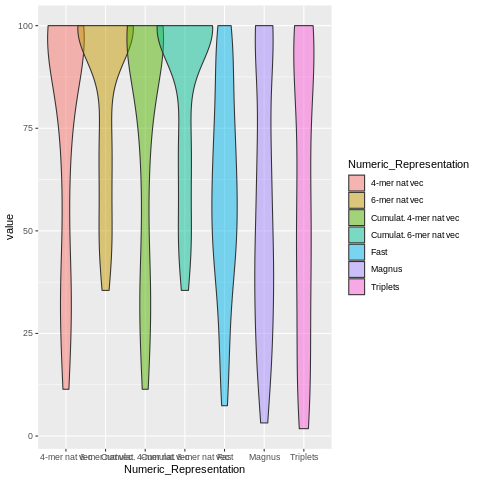

In [77]:
%%R
library(reshape2)

btsp = as.data.frame(rbind(
  c(pa$data$Support,"Triplets") ,
  c(pb$data$Support,"Fast"),
  c(pc$data$Support,"Magnus"),
  c(pd$data$Support,"4-mer nat vec"),
  c(pd$data$Support,"Cumulat. 4-mer nat vec"),
  c(pe$data$Support,"6-mer nat vec"),
  c(pe$data$Support,"Cumulat. 6-mer nat vec")   
))
row.names(btsp) = btsp[,137]

btsp = melt(btsp,na.rm = T, id.vars = 'V137')
btsp$value = as.numeric(btsp$value)
names(btsp)[1] = "Numeric_Representation"

supps = btsp %>%
ggplot(aes(x = Numeric_Representation, y = value, fill = Numeric_Representation)) +
  geom_violin(width=1.4, alpha=0.5)

#pdf("FIG_Support_dist_based.pdf", paper = "a4r")
plot(supps)
#dev.off()

### Plotting the trees

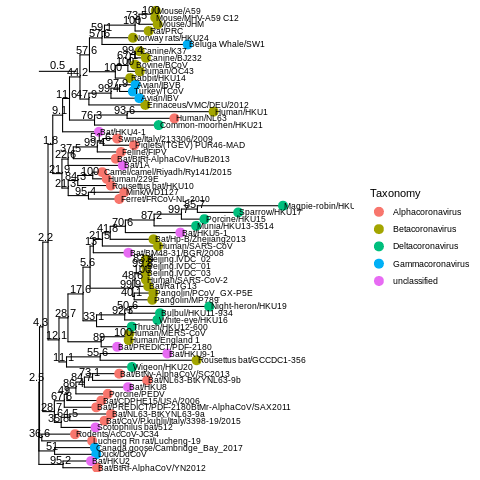

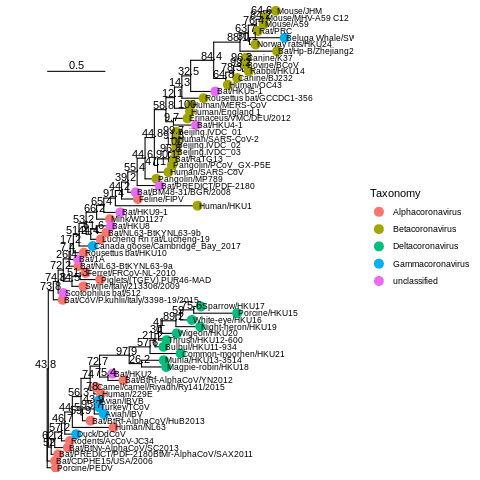

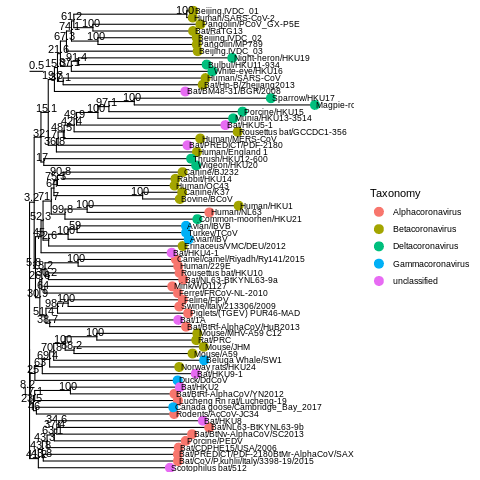

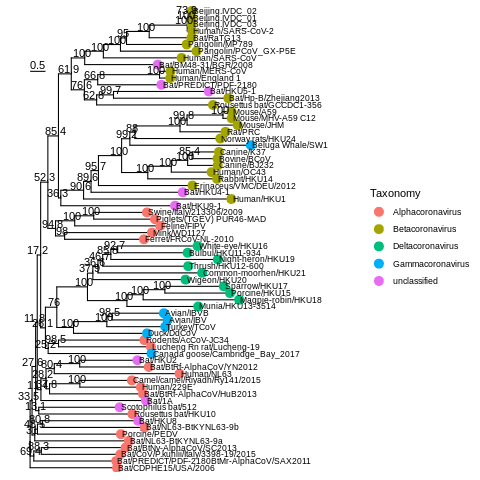

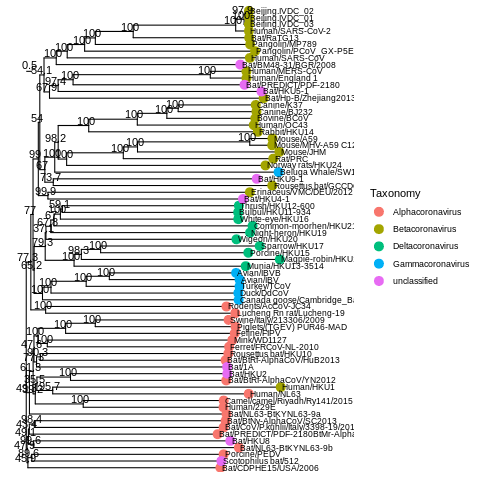

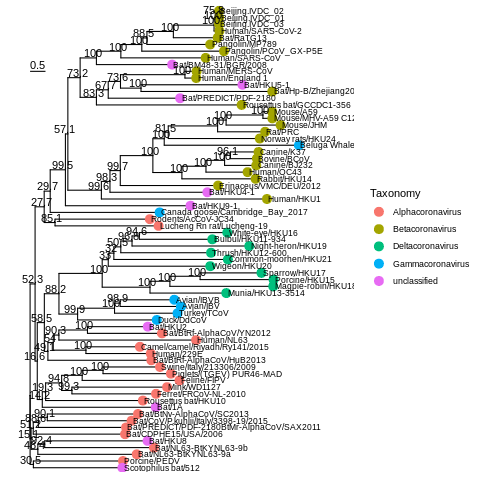

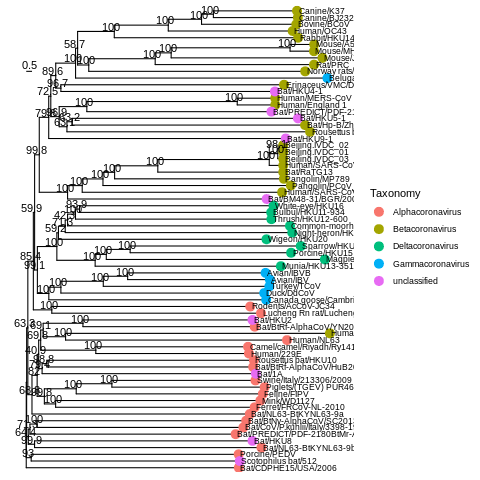

In [78]:
%%R
#svg("FIG_tree_triplet.svg",width = 20, height = 10)
plot(pa)
#dev.off()

#svg("FIG_tree_fast.svg",width = 20, height = 10)
plot(pb)
#dev.off()

#svg("FIG_tree_magnus.svg",width = 20, height = 10)
plot(pc)
#dev.off()

#svg("FIG_tree_4nat.svg",width = 20, height = 10)
plot(pd)
#dev.off()

#svg("FIG_tree_6nat.svg",width = 20, height = 10)
plot(pe)
#dev.off()

#svg("FIG_tree_cumulat.4nat.svg",width = 20, height = 10)
plot(pdc)
#dev.off()

#svg("FIG_tree_cumulat.6nat.svg",width = 20, height = 10)
plot(pec)


# Assessing tree morfological statistics and tree correlation

In [79]:
%%R
library(dendextend)

tree = read.iqtree("trimm_alig_cov.fasta.contree") 

a = nj(dist(triplet, method = "euclidean"))
b = nj(dist(fast, method = "euclidean"))
c = nj(dist(magnus, method = "euclidean"))
d = nj(dist(nat4mer, method = "euclidean"))
dc = nj(dist(cnat4mer, method = "euclidean"))
e = nj(dist(nat6mer, method = "euclidean"))
ec = nj(dist(cnat6mer, method = "euclidean"))

aa = phyloTop(c(as.phylo(a)), normalise = F)
bb = phyloTop(c(as.phylo(b)), normalise = F)
cc = phyloTop(c(as.phylo(c)), normalise = F)
dd = phyloTop(c(as.phylo(d)), normalise = F)
ddc = phyloTop(c(as.phylo(dc)), normalise = F)
ee = phyloTop(c(as.phylo(e)), normalise = F)
eec = phyloTop(c(as.phylo(ec)), normalise = F)

tt = phyloTop(c(as.phylo(tree)), normalise = F)

hm = rbind(aa, bb, cc, dd, ddc, ee, eec, tt)
row.names(hm) = c("Triplets", "Fast", "Magnus", "4-mer nat vec", "Cumulat. 4-mer nat vec", "6-mer nat vec", "Cumulat. 6-mer nat vec", "IQTREE2")
print(hm)


print("#########")
print( cor_cophenetic(as.phylo(a),as.phylo(tree), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(b),as.phylo(tree), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(c),as.phylo(tree), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(d),as.phylo(tree), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(dc),as.phylo(tree), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(e),as.phylo(tree), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(ec),as.phylo(tree), method_coef = "spearman") )


print("#############")
print( cor_cophenetic(as.phylo(a),dist(triplet), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(b),dist(fast), method_coef = "spearman")    )
print( cor_cophenetic(as.phylo(c),dist(magnus), method_coef = "spearman")  )
print( cor_cophenetic(as.phylo(d),dist(nat4mer), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(dc),dist(cnat4mer), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(e),dist(nat6mer), method_coef = "spearman") )
print( cor_cophenetic(as.phylo(ec),dist(cnat6mer), method_coef = "spearman") )

                       avgLadder cherries colless.phylo ILnumber maxHeight
Triplets                3.375000       18           408       33        16
Fast                    3.636364       13           881       43        29
Magnus                  4.000000       22           239       25        13
4-mer nat vec           3.500000       16           476       37        18
Cumulat. 4-mer nat vec  3.000000       16           304       37        15
6-mer nat vec           3.571429       19           233       31        14
Cumulat. 6-mer nat vec  3.666667       19           423       31        16
IQTREE2                 4.000000       22           542       25        20
                       pitchforks sackin.phylo   stairs1   stairs2
Triplets                       13          692 0.7205882 0.5393930
Fast                            7         1107 0.8088235 0.3569931
Magnus                          8          547 0.6176471 0.6174779
4-mer nat vec                  14          748 0.7205882 

# Graphical comparison of trees, with customized GGTREE tanglegram

In [92]:
%%R
library(cowplot)
library(treeio)
library(castor)
library(tidyverse)
library(ggExtra)
library(ggpubr)
library(ggpmisc)
library(ggtree)
library(phylotools)

normalize <- function(x, na.rm = TRUE) {
  return((x- min(x)) /(max(x)-min(x)))
}

boot.ggtree2 <- function(data, B = 1000, nt = 4, nudgex = -0.25, nudgey = 0.7) {
  func <- function(x) nj(dist(x, method = "euclidean"))
  tr_real = func(data)
  btp = boot.phylo(tr_real, data, FUN=func, B=B, mc.cores = nt)
  p = ggtree(tr_real, ladderize = T) 
  p$data = left_join(p$data, meta, by="label")
  p$data$Support = NA
  p$data$Support[p$data$isTip == FALSE] = btp / B * 100
  p1 = p + geom_tippoint(aes(color = Taxonomy), size = 4) +
    geom_treescale(x=0, y=60, width=0.5, color='black') + 
    geom_text2(aes(label=Support, subset = !is.na(as.numeric(Support)) ), nudge_x = nudgex, nudge_y = nudgey)
  return(p1)
}

#re-reading metadata file
meta = read.csv("meta_cov.csv", sep=",", stringsAsFactors = F)
names(meta)[2] = "label"

tree = read.iqtree("trimm_alig_cov.fasta.contree") 

p = ggtree(tree, ladderize = T)
p$data = left_join(p$data, meta, by="label") 
p1 = p + geom_tippoint(aes(color = Taxonomy), size = 4) +
  geom_tiplab(aes(label = Name), size = 4) +
  geom_treescale(x=0, y=60, width=0.5, color='black') + 
  geom_text2(aes(label=label, subset = !is.na(as.numeric(label))), size = 4 , nudge_x = -0.095, nudge_y = 0.7)

T1 <- p1 + theme(legend.position="none", plot.margin = unit(c(0.9,0,0.91,0),"cm")) + xlim(-0.3,3.5) 



Running parallel bootstraps... done.
Calculating bootstrap values... done.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


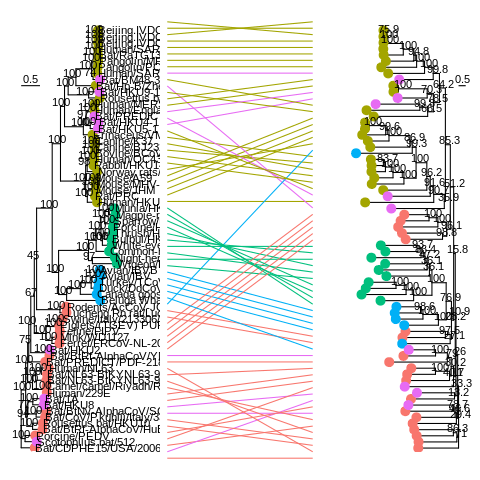

In [93]:
%%R
set.seed(42)
d = boot.ggtree2(nat4mer, B = 1000, nt = 4, nudgex = 0.3, nudgey = 0.7)

T2 <- d +  geom_tiplab(aes(label = ""), size = 4) +
  scale_x_reverse() + theme(legend.position="none", plot.margin = unit(c(0.9,0,0.9,0),"cm")) + xlim(9,-1)

d1 = p$data[T1$data$isTip,]
d1[,5:6] = NULL  
d1$x[] = 1  
d2 = T2$data[T2$data$isTip,1:13]  
d2$x[] = 2

TTcon <- rbind(d1, d2)  

L1 = ggplot(TTcon, aes(x = x, y = y, col = Taxonomy, group = label)) + geom_line() + theme_void()+ theme(legend.position="none", plot.margin = unit(c(0,0,0,0),"cm"))# + ylim(1,69)

#svg("FIG_tanglegrama4.svg",width = 20, height = 10)
plot(cowplot::plot_grid(T1, L1 ,T2, nrow = 1))
#dev.off()

Running parallel bootstraps... done.
Calculating bootstrap values... done.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


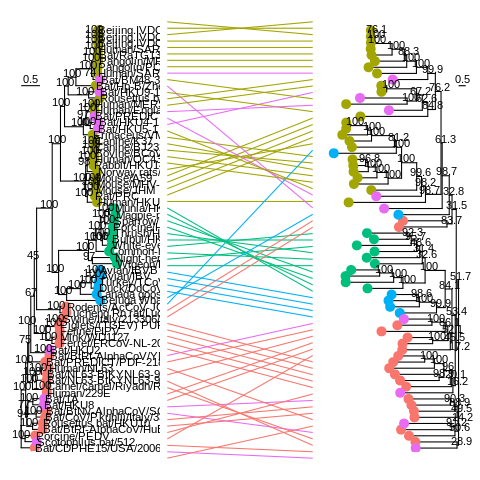

In [96]:
%%R
set.seed(42)
d = boot.ggtree2(cnat4mer, B = 1000, nt = 4, nudgex = 0.3, nudgey = 0.7)

T2 <- d +  geom_tiplab(aes(label = ""), size = 4) +
  scale_x_reverse() + theme(legend.position="none", plot.margin = unit(c(0.9,0,0.9,0),"cm")) + xlim(9,-1)

d1 = p$data[T1$data$isTip,]
d1[,5:6] = NULL  
d1$x[] = 1  
d2 = T2$data[T2$data$isTip,1:13]  
d2$x[] = 2

TTcon <- rbind(d1, d2)  

L1 = ggplot(TTcon, aes(x = x, y = y, col = Taxonomy, group = label)) + geom_line() + theme_void()+ theme(legend.position="none", plot.margin = unit(c(0,0,0,0),"cm"))# + ylim(1,69)

#svg("FIG_tanglegramac4.svg",width = 20, height = 10)
plot(cowplot::plot_grid(T1, L1 ,T2, nrow = 1))
#dev.off()

Running parallel bootstraps... done.
Calculating bootstrap values... done.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


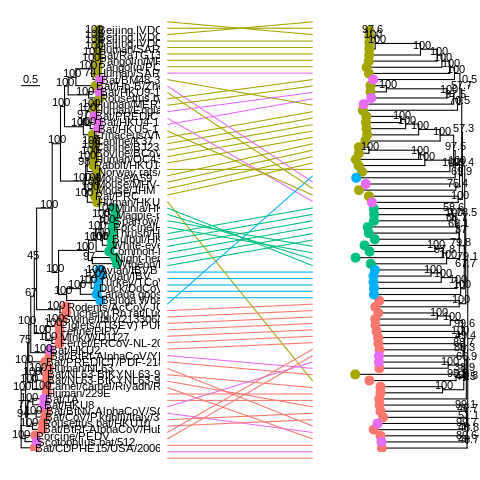

In [109]:
%%R
set.seed(42)
d = boot.ggtree2(nat6mer, B = 1000, nt = 4, nudgex = 0.3, nudgey = 0.7)

T2 <- d +
  scale_x_reverse() + theme(legend.position="none", plot.margin = unit(c(0.9,0,0.9,0),"cm")) + xlim(27,-1)

d1 = p$data[T1$data$isTip,]
d1[,5:6] = NULL  
d1$x[] = 1  
d2 = T2$data[T2$data$isTip,1:13]  
d2$x[] = 2  

TTcon <- rbind(d1, d2)  

L1 = ggplot(TTcon, aes(x = x, y = y, col = Taxonomy, group = label)) + geom_line() + theme_void() + theme(legend.position="none", plot.margin = unit(c(0,0,0,0),"cm"))# + ylim(1,69)

#svg("FIG_tanglegrama6.svg",width = 20, height = 10)
plot(cowplot::plot_grid(T1, L1 ,T2, nrow = 1))
#dev.off()

Running parallel bootstraps... done.
Calculating bootstrap values... done.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


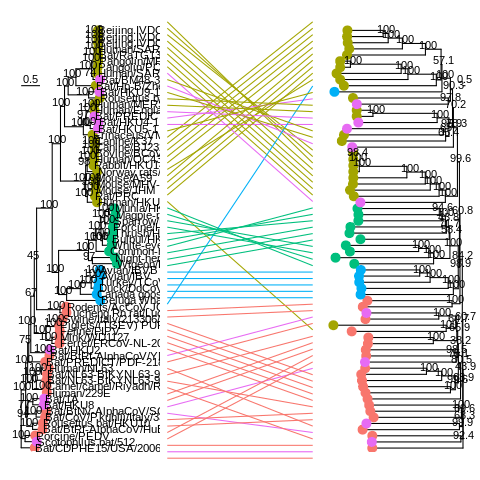

In [111]:
%%R
set.seed(42)
d = boot.ggtree2(cnat6mer, B = 1000, nt = 12, nudgex = 0.55, nudgey = 0.7)

T2 <- d +  
  scale_x_reverse()+ theme(legend.position="none", plot.margin = unit(c(0.9,0,0.9,0),"cm")) + xlim(27, -2)

d1 = p$data[T1$data$isTip,]
d1[,5:6] = NULL  
d1$x[] = 1  
d2 = T2$data[T2$data$isTip,1:13]  
d2$x[] = 2  

TTcon <- rbind(d1, d2)  

L1 = ggplot(TTcon, aes(x = x, y = y, col = Taxonomy, group = label)) + geom_line() + theme_void() + theme(legend.position="none", plot.margin = unit(c(0,0,0,0),"cm"))# + ylim(1,69)

#svg("FIG_tanglegramac6.svg",width = 20, height = 10)
plot(cowplot::plot_grid(T1, L1 ,T2, nrow = 1))
#dev.off()